In [1]:
import numpy as np

___Задача 1___

Контрольная работа состоит из пяти вопросов. На каждый вопрос приведено четыре варианта ответа, один из которых правильный. Составьте закон распределения числа правильных ответов при простом угадывании. Найдите M(X), D(X).

Число угадываний правильных ответов (= X) есть величина дискретная. Поэтому применим биномиальный закон распределения — это закон распределения числа 𝑋=𝑘  наступлений события 𝐴 (= угадывание правильного ответа) в 𝑛 независимых испытаниях (= 5 билетов), в каждом из которых оно может произойти с вероятностью 𝑝 (= 1 правильный ответ из 4 вопросов, т.е. 0.25).

Применяя формулу Бернулли:

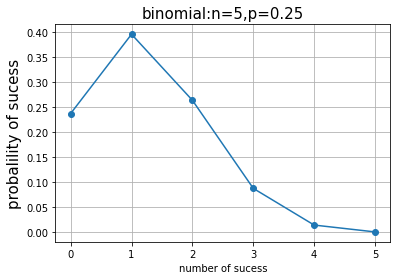

In [7]:
import matplotlib.pyplot as plt 
import math
from scipy import stats
 
n = 5 
p = 0.25
k = np.arange(0,n+1)
binomial = stats.binom.pmf(k,n,p)
plt.plot(k,binomial,'o-')
plt.title('binomial:n=%i,p=%.2f'%(n,p),fontsize=15)
plt.xlabel('number of sucess',fontproperties='SimHei')
plt.ylabel('probalility of sucess',fontsize=15)
plt.grid(True)
plt.show()

In [11]:
x_values = np.arange(0, 6)
print(x_values)
print(binomial)

[0 1 2 3 4 5]
[0.23730469 0.39550781 0.26367187 0.08789062 0.01464844 0.00097656]


In [13]:
x_probalilities = np.array(binomial)

[0.23730469 0.39550781 0.26367187 0.08789062 0.01464844 0.00097656]


Найдём математическое ожидание, как m = n*p 

In [15]:
m = x_values.dot(x_probalilities)
print(m)

1.2499999999999998


Найдём дисперсию, как d = n*p*(1-p)

In [16]:
d = n * p * (1 - p)
print(d)

0.9375


___Задача 2___

Вероятность поймать рыбу при одном забрасывании удочки равна 0.01. Какова вероятность того, что число пойманных рыб при 200 забросах удочки будет не менее 5 и не более 10?

Так как мы имеем дело с большим количеством испытаний  𝑛  и при этом вероятность  𝑝  появления события  𝐴  в отдельном испытании мала, применяют формулу Пуассона для вычисления вероятности того, что событие произойдет  𝑚  раз в  𝑛  испытаниях:

In [27]:
from math import factorial

In [28]:
n = 200
p = 0.01
lambda_ = n * p
def poisson_proba(k, lambda_):
    return(lambda_ ** k) * (np.exp(-lambda_)) / math.factorial(k)

Считаем сумму вероятностей поймать от 5 до 10 рыб при 200 забрасываний:

In [32]:
s_p_p = sum(poisson_proba(k=i, lambda_=lambda_) for i in range(5,11))
print(s_p_p)

0.052644709119342686


___Задача 3___

В условиях предыдущей задачи сколько забросов удочки нужно сделать чтобы быть уверенным с вероятностью 0.9, что хотя бы 10 раз будет поймана рыба?

Подсказка. Как посчитать P(X >= k) для величины X, имеющей биномиальное распределение? Здесь предстоит немножко покодить.

При помощи цикла находим число бросков для вероятности поймать не менее 10 рыб. Для этого из общей вероятности (= 1) вычитаем вероятность поймать < 10 рыб. 

In [35]:
n = 200
p = 0.01
k = 10
lambda_ = n * p

s_p_p = sum(poisson_proba(k=i, lambda_=lambda_) for i in range(0,10))
p_x = (lambda_ ** k) * (np.exp(-lambda_)) / math.factorial(k)
a = 1 - s_p_p

while a < 0.9:
    n +=1
    poisson_proba(k, lambda_= n * p)
    s_p_p = sum(poisson_proba(k=i, lambda_=n * p) for i in range(0, 10))
    a = 1 - s_p_p
    print(f'при {n} бросках вероятность поймать 10 рыб = {a}')

при 201 бросках вероятность поймать 10 рыб = 4.8441303632906774e-05
при 202 бросках вероятность поймать 10 рыб = 5.0453298061525764e-05
при 203 бросках вероятность поймать 10 рыб = 5.253603004495844e-05
при 204 бросках вероятность поймать 10 рыб = 5.469151344750234e-05
при 205 бросках вероятность поймать 10 рыб = 5.69218047911102e-05
при 206 бросках вероятность поймать 10 рыб = 5.922900378518836e-05
при 207 бросках вероятность поймать 10 рыб = 6.16152538632786e-05
при 208 бросках вероятность поймать 10 рыб = 6.408274271163528e-05
при 209 бросках вероятность поймать 10 рыб = 6.663370279980096e-05
при 210 бросках вероятность поймать 10 рыб = 6.927041191195915e-05
при 211 бросках вероятность поймать 10 рыб = 7.199519367306895e-05
при 212 бросках вероятность поймать 10 рыб = 7.481041807599897e-05
при 213 бросках вероятность поймать 10 рыб = 7.771850200655184e-05
при 214 бросках вероятность поймать 10 рыб = 8.07219097680445e-05
при 215 бросках вероятность поймать 10 рыб = 8.382315360055959e